# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [1]:
import os

# Install Kaggle API client
!pip install kaggle --upgrade

In [8]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bimaindr","key":"debdc40655e944ab95ac8886db6fdfc5"}'}

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho
!unzip -q vehicle-dataset-from-cardekho.zip -d vehicle-dataset-from-cardekho

Dataset URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
License(s): DbCL-1.0
vehicle-dataset-from-cardekho.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
df = pd.read_csv('/content/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [21]:
df.shape

(4340, 8)

In [22]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

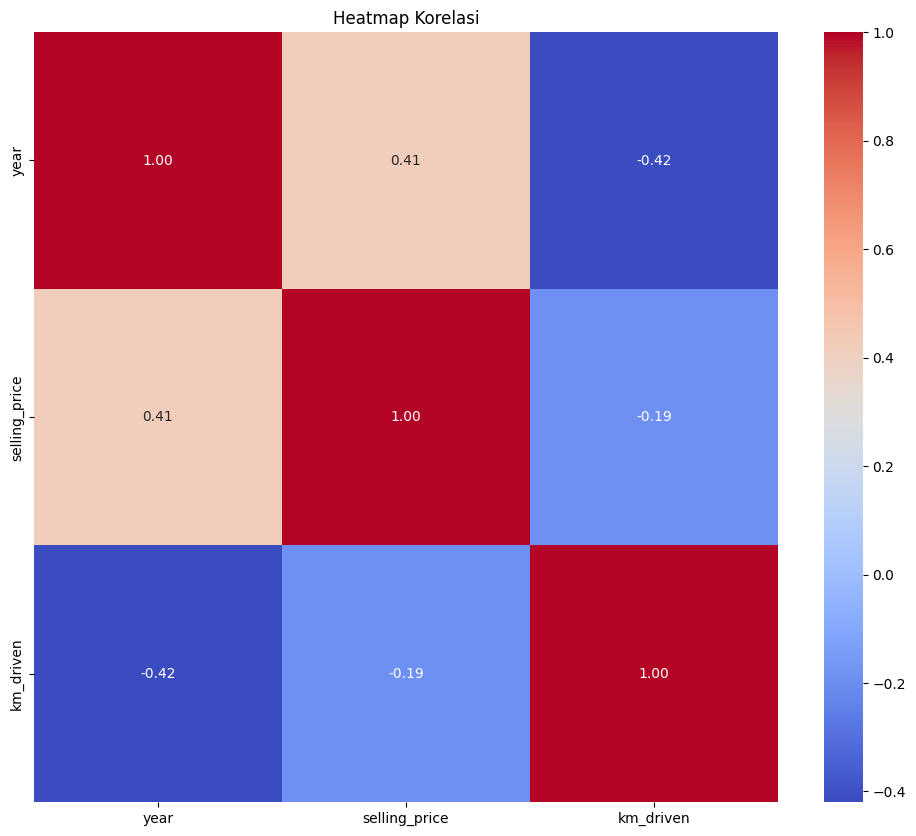

In [25]:
#Matriks Korelasi untuk numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

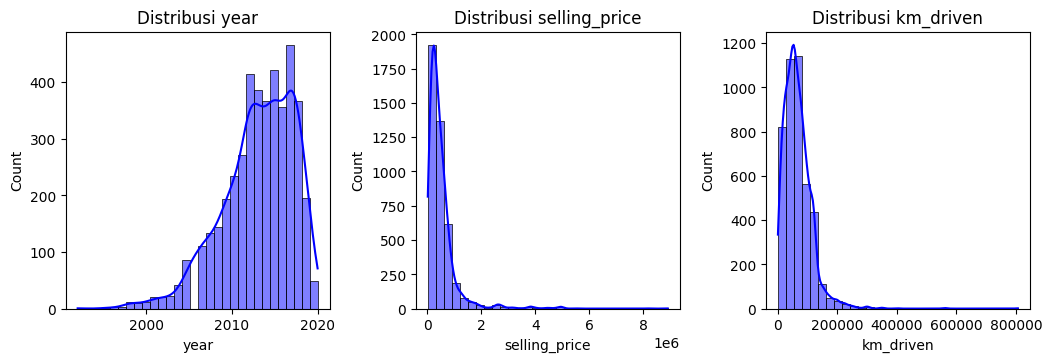

In [26]:
# Distribusi untuk numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2381850624.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[df[column].isin(top_categories)][column], palette='viridis')
/tmp/ipython-input-2381850624.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-2381850624.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-2381850624.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` var

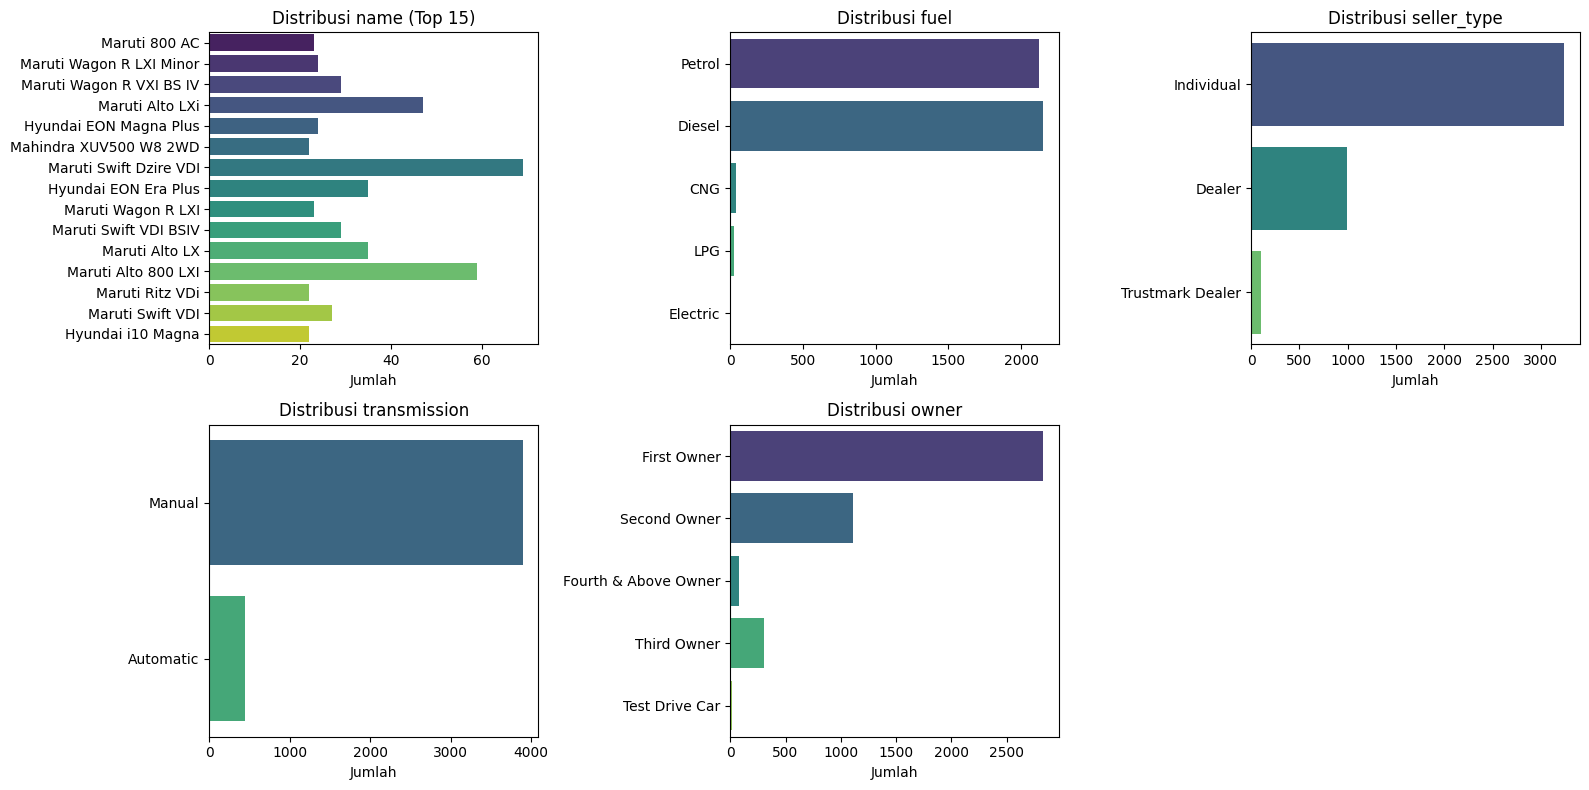

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = df.select_dtypes(include=[object])

n_cols = 3
n_rows = (len(cat_features.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 4 * n_rows))

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)

    if df[column].nunique() > 15:
        top_categories = df[column].value_counts().nlargest(15).index
        sns.countplot(y=df[df[column].isin(top_categories)][column], palette='viridis')
        plt.title(f'Distribusi {column} (Top 15)')
    else:
        sns.countplot(y=df[column], palette='viridis')
        plt.title(f'Distribusi {column}')

    plt.xlabel('Jumlah')
    plt.ylabel('')
    plt.tight_layout()

plt.show()


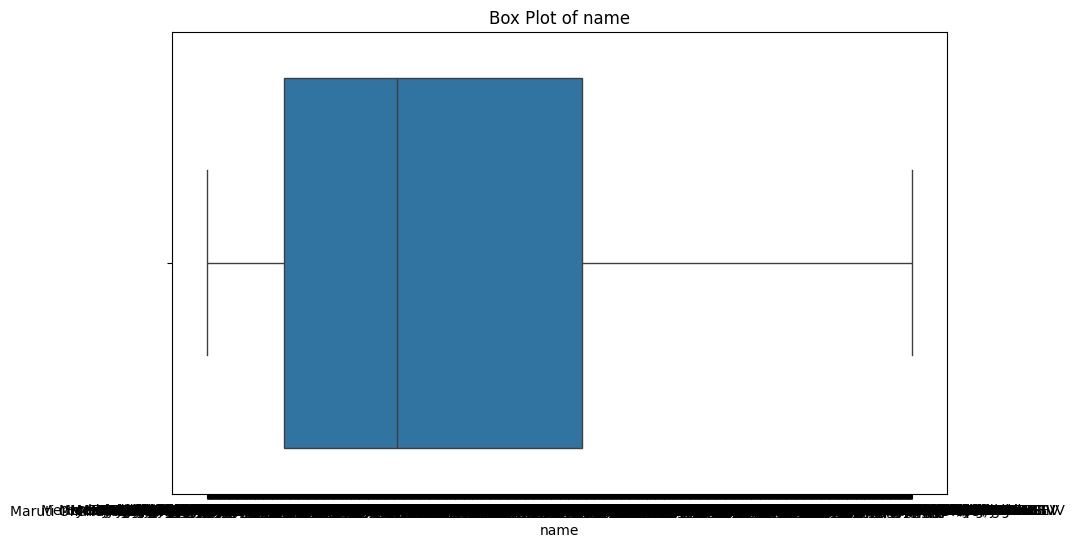

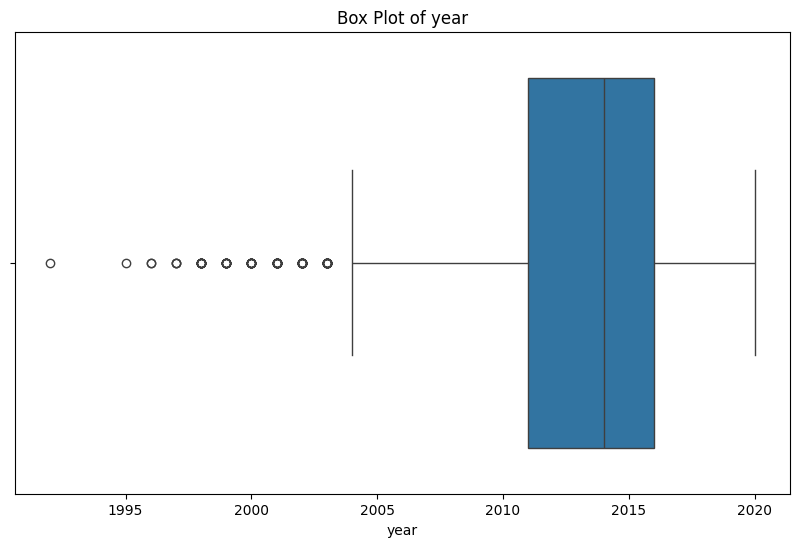

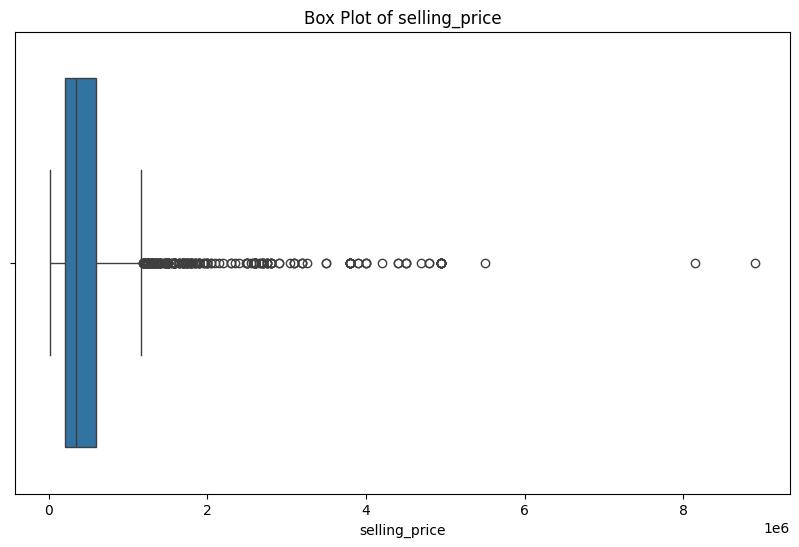

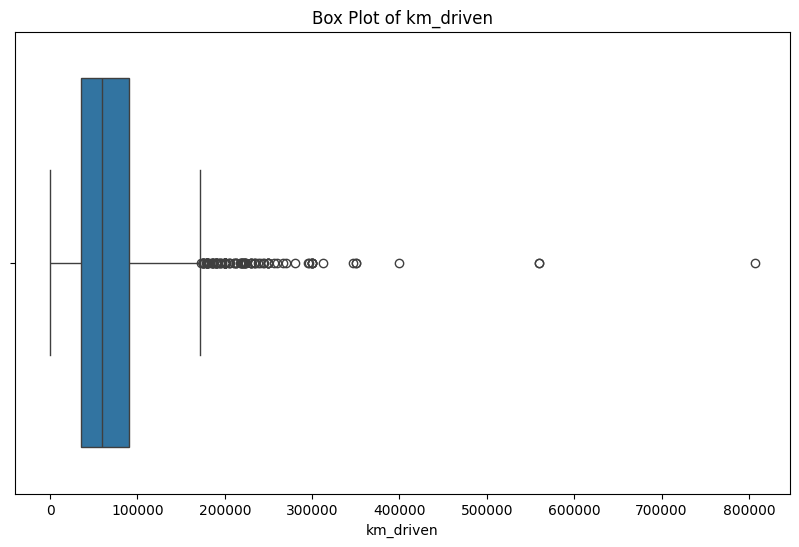

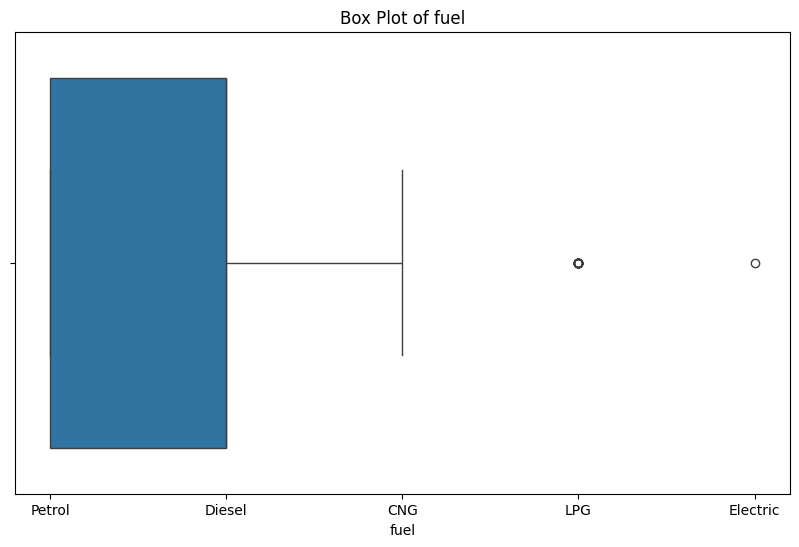

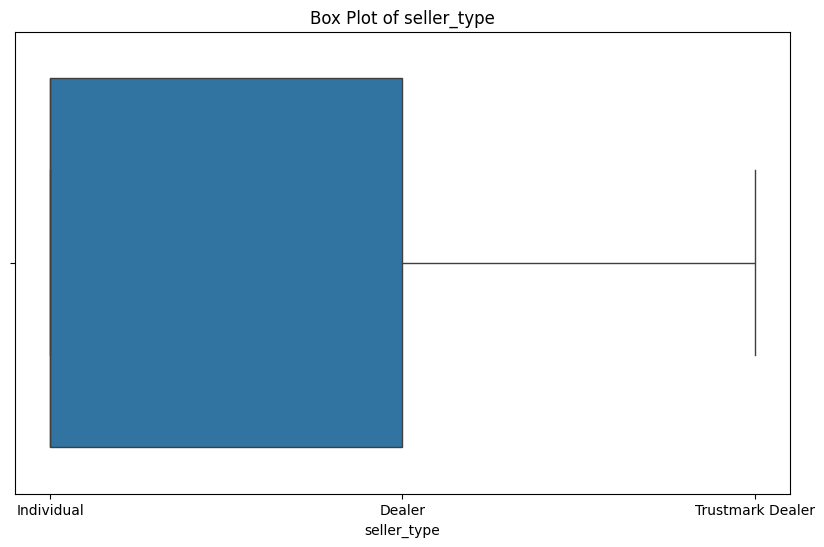

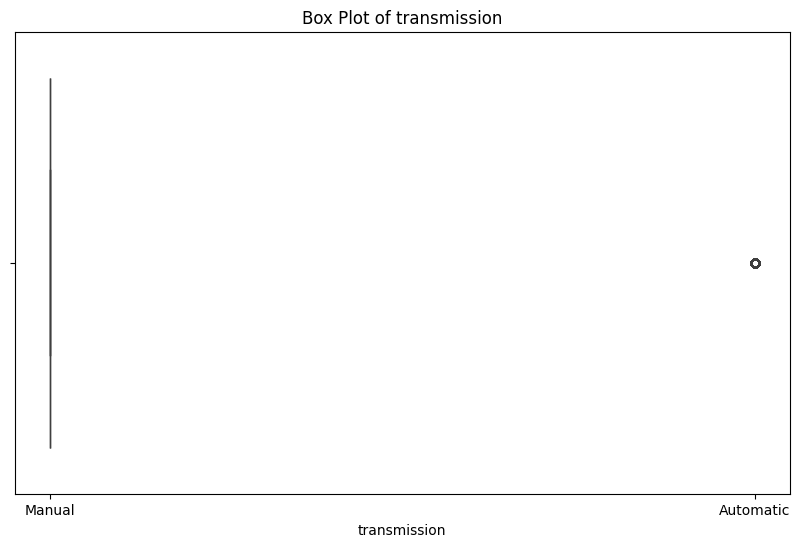

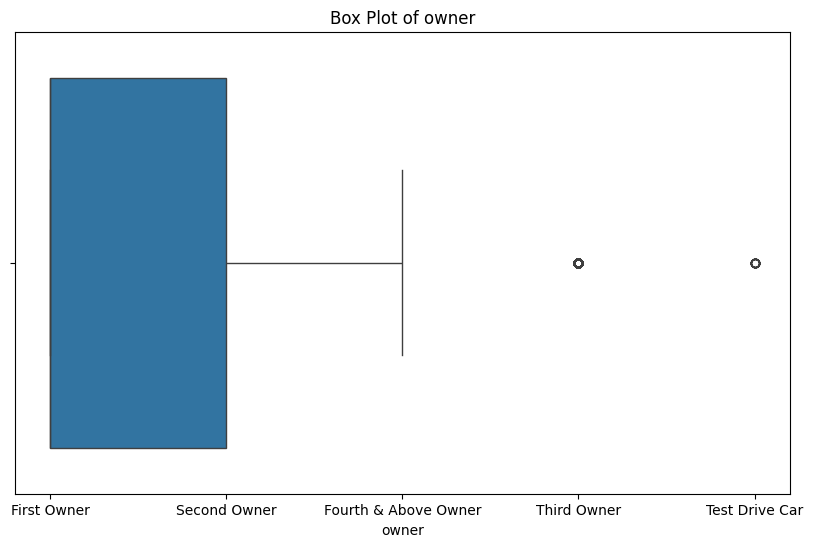

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in df.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [30]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [34]:
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

print("Baris duplikat telah dihapus.")

# Memverifikasi penghapusan duplikat
print("\nJumlah baris duplikat setelah penghapusan:")
print(df.duplicated().sum())

Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan:
0


In [38]:
standard_scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df_scaled = df.copy()
df_scaled[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])
df_scaled.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,-1.402566,-0.812819,0.015754,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,-1.402566,-0.665538,-0.404650,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,-0.226418,0.247604,0.646360,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,0.949731,-0.439708,-0.488731,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,0.244042,-0.046958,1.508188,Diesel,Individual,Manual,Second Owner


In [39]:
columns_to_drop = ['name']  # kolom dengan nilai unik/teks panjang yang tidak berguna langsung
existing_columns_to_drop = [col for col in columns_to_drop if col in df_scaled.columns]
df_scaled = df_scaled.drop(columns=existing_columns_to_drop)

df_scaled.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,-1.402566,-0.812819,0.015754,Petrol,Individual,Manual,First Owner
1,-1.402566,-0.665538,-0.404650,Petrol,Individual,Manual,First Owner
2,-0.226418,0.247604,0.646360,Diesel,Individual,Manual,First Owner
3,0.949731,-0.439708,-0.488731,Petrol,Individual,Manual,First Owner
4,0.244042,-0.046958,1.508188,Diesel,Individual,Manual,Second Owner


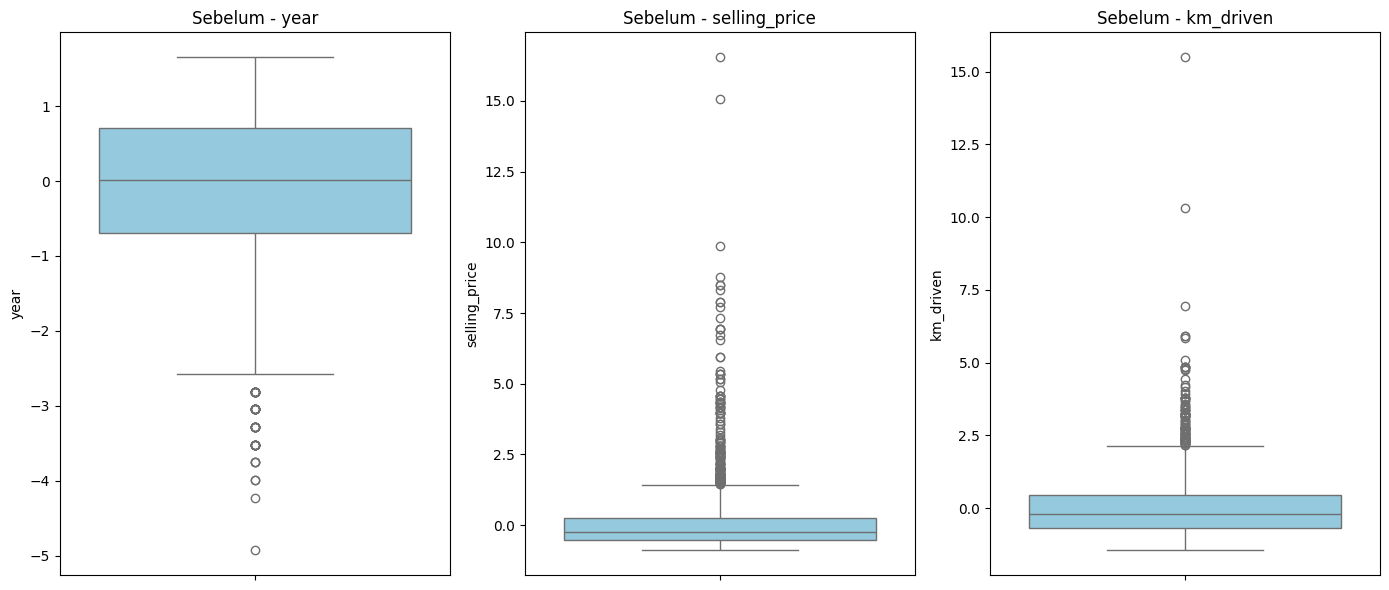

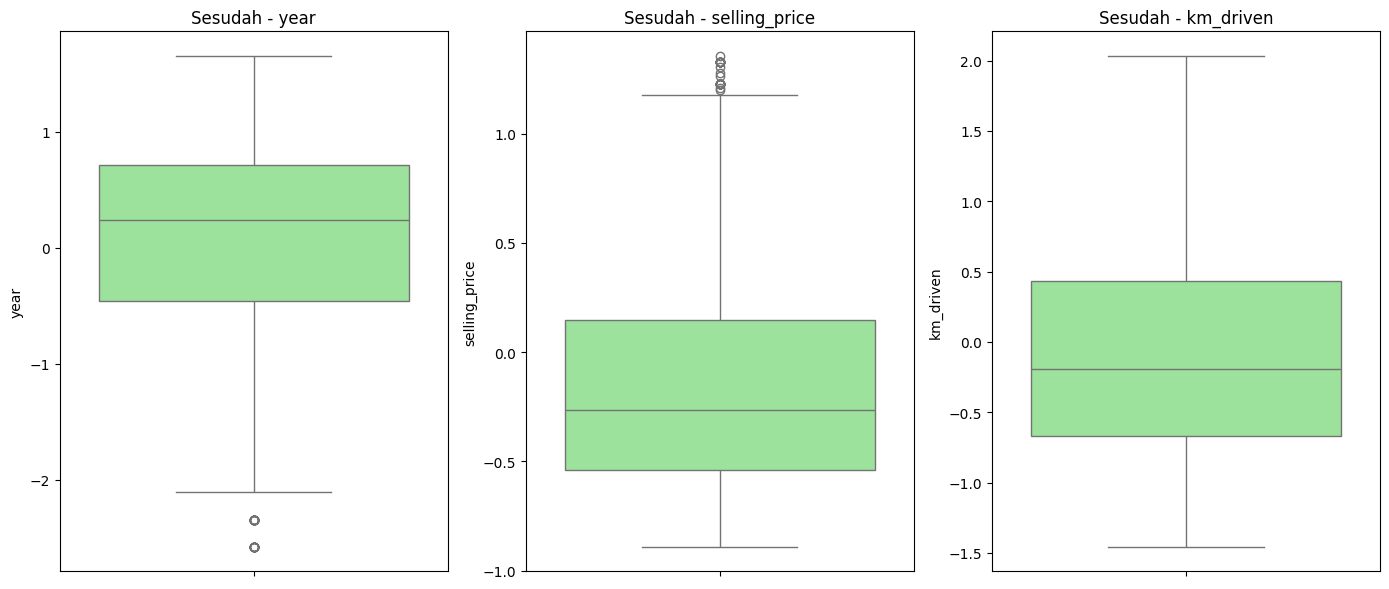

In [40]:
num_cols = df_scaled.select_dtypes(include=["float64", "int64"]).columns

def handle_outliers_iqr(data, columns, drop=True):
   df_out = data.copy()
   for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if drop:
            df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
        else:
            df_out[col] = df_out[col].clip(lower, upper)

   return df_out

#sebelum
plt.figure(figsize=(14, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df_scaled[col], color="skyblue")
    plt.title(f"Sebelum - {col}")
plt.tight_layout()
plt.show()

df_scaled = handle_outliers_iqr(df_scaled, num_cols, drop=True)

plt.figure(figsize=(14, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df_scaled[col], color="lightgreen")
    plt.title(f"Sesudah - {col}")
plt.tight_layout()
plt.show()

In [41]:
cat_cols = df_scaled.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", list(cat_cols))

Kolom kategorikal: ['fuel', 'seller_type', 'transmission', 'owner']


In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col])
    label_encoders[col] = le

df_scaled.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,-1.402566,-0.812819,0.015754,4,1,1,0
1,-1.402566,-0.665538,-0.404650,4,1,1,0
2,-0.226418,0.247604,0.646360,1,1,1,0
3,0.949731,-0.439708,-0.488731,4,1,1,0
4,0.244042,-0.046958,1.508188,1,1,1,2


In [43]:
bins = [
    df_scaled['selling_price'].quantile(0.0),
    df_scaled['selling_price'].quantile(0.33),
    df_scaled['selling_price'].quantile(0.66),
    df_scaled['selling_price'].quantile(1.0)
]

labels = ['Low', 'Medium', 'High']

# Membuat kolom kategori harga
df_scaled['price_category'] = pd.cut(df_scaled['selling_price'], bins=bins, labels=labels, include_lowest=True)

# Cek hasil distribusi
print("Distribusi kategori harga:")
print(df_scaled['price_category'].value_counts())

# Tampilkan sebagian data
df_scaled[['selling_price', 'price_category']].head(10)

Distribusi kategori harga:
price_category
Low       1159
High      1087
Medium     972
Name: count, dtype: int64


,selling_price,price_category
0,-0.812819,Low
1,-0.665538,Low
2,0.247604,High
3,-0.439708,Low
4,-0.046958,Medium
5,-0.655720,Low
6,0.149417,High
7,-0.459345,Low
8,0.738541,High
9,-0.213877,Medium
